<a href="https://colab.research.google.com/github/zpalevani/Capstone2/blob/main/Capstone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Objective:** K-Means Clustering for Identifying High-Risk Patient Groups Using Serum Creatinine Levels

The objective of this project is to apply K-Means clustering to segment patients based on key health indicators, specifically focusing on age and serum creatinine levels. Given that elevated serum creatinine is a biomarker of kidney dysfunction and a predictor of cardiovascular risks, this clustering approach aims to:

1. **Identify Distinct Patient Groups:**

 *   Group patients into clusters based on similarities in age and serum creatinine levels.

 *   Differentiate between high-risk, moderate-risk, and low-risk groups to aid targeted interventions.

2. **Assess Health Risks Associated with Each Cluster:**

 *   Analyze cluster characteristics to determine potential risks of stroke, heart disease, and kidney failure.

 *   Provide insights into how age and serum creatinine levels correlate with cardiovascular health outcomes.

3. **Support Preventive Healthcare Measures:**

 *   Enable healthcare providers to prioritize patients who require early interventions and continuous monitoring.

 *   Use clustering results to inform personalized treatment plans and improve patient outcomes.

4. **Enhance Data-Driven Decision Making:**

Leverage machine learning techniques to derive actionable insights from clinical datasets.
Offer a scalable solution for predictive healthcare using unsupervised learning methods.

**Key Success Metrics:**

 *   Clear identification of three distinct patient clusters with meaningful differences in health risk profiles.

 *   Visualizations that effectively communicate cluster characteristics and their clinical implications.

 *   Insights that align with established thresholds for serum creatinine levels associated with heart disease and stroke risks.

# Resources

*   Dataset Source: [link](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)

*   For additional reading on the dataset please read the "Dataset" section in this paper: [Link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5?utm_source=chatgpt.com#Sec2)

# Exploratory Data Analysis



**Load the Data**

In [35]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")


# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
    age  anae

**Check for Missing Values**

In [36]:
print(df.isnull().sum())  # Check for missing values


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Summary Statistics**

In [37]:
print(df.describe())  # Get statistical summary


              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

**Check for Duplicate Entries**

In [38]:
print(f"Duplicate Rows: {df.duplicated().sum()}") # Check for duplicate values


Duplicate Rows: 0


**Visualizing Distributions**

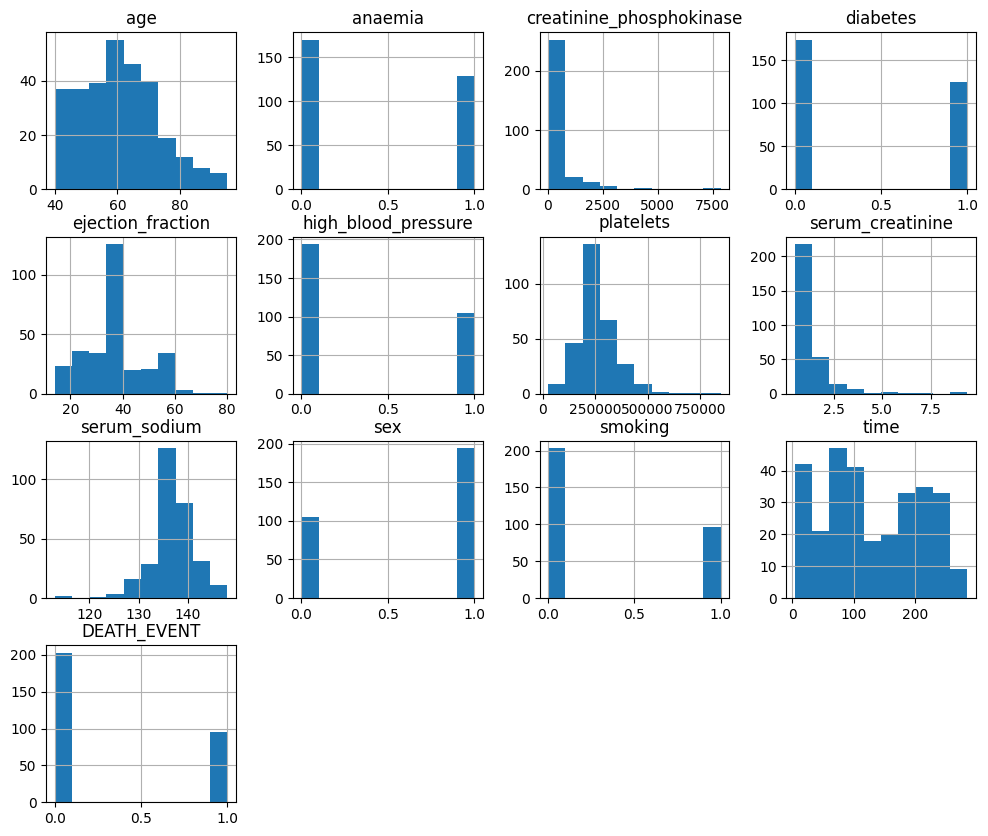

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
df.hist(figsize=(12, 10))
plt.show()


The histogram visualization provides insights into the distribution of various features in the dataset. Here's what you can observe:

*   Age - The distribution is right-skewed, with most patients being between 40 and 80 years old.

*   Anaemia, High Blood Pressure, Diabetes, Sex, Smoking these are binary variables (0 or 1), so their histograms show two bars, indicating the proportion of patients with or without these conditions.

*   Creatinine Phosphokinase - This variable has a highly skewed distribution, with most values concentrated at lower levels but some extreme outliers.

*   Ejection Fraction - The distribution appears to be somewhat normal, centered around a mid-range value.

*   Platelets - Shows a roughly normal distribution, but with some variance in the spread.

*   Serum Creatinine - Skewed distribution, with most values concentrated at the lower end but a few higher values indicating possible outliers.

*   Serum Sodium - Appears to have a normal distribution with most values clustering around a central value.

*   Time - The distribution appears somewhat uniform but with some peaks, possibly indicating key check-up or event times.

*   Death Event - This binary variable shows two bars, indicating the number of patients who survived (0) and those who died (1).


Key Observations:

*   Right-Skewed Distributions: Variables like creatinine phosphokinase and serum creatinine have highly skewed distributions, suggesting that some extreme values may need further investigation.

*   Binary Distributions: Variables such as anaemia, high blood pressure, sex, and smoking have clear binary categories.

*   Potential Outliers: Some features like creatinine phosphokinase and serum creatinine have extreme values, which could influence model performance if not handled properly.

**Correlation Analysis**

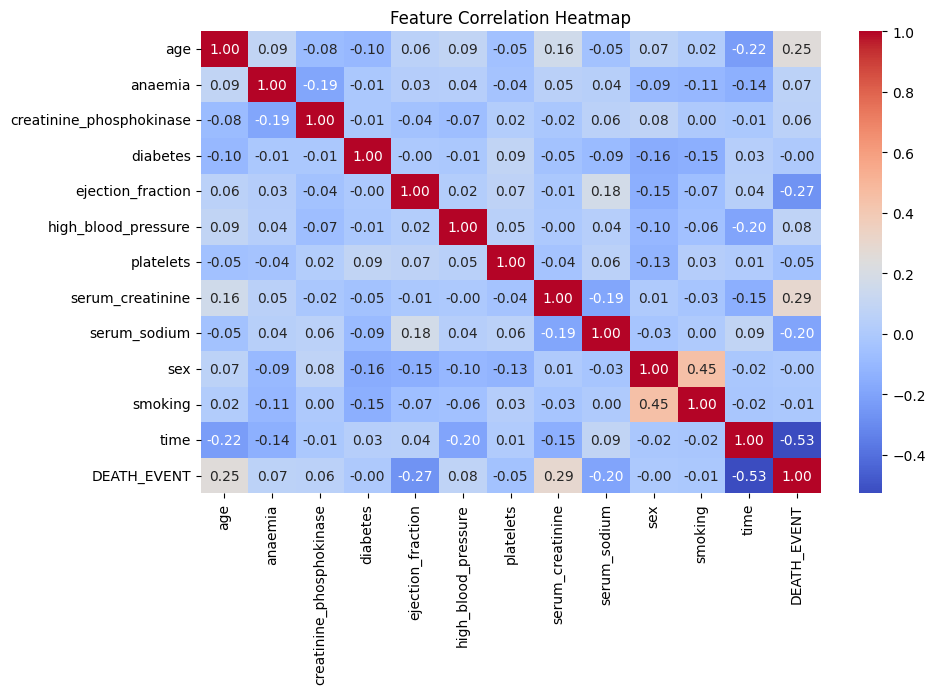

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Nothing jumps out as a strongly correlated item but there are still signs of correlation in the grey cells with somewhat strong correlation between features.

**Checking for Feature Distribution with KDE Plots**

**How to Read the Output?**

*   If the KDE plot is bell-shaped (normal distribution)

The feature follows a normal (Gaussian) distribution.
Example: Age has a bell-shaped curve.

*   If the KDE plot is right-skewed (long tail on the right)

Most values are low, but a few extreme high values exist (outliers).
Example: Creatinine Phosphokinase (CPK) shows this pattern.

*   If the KDE plot is left-skewed (long tail on the left)

Most values are high, with a few very small values.
Example: Ejection Fraction is left-skewed.

*   If the KDE plot has multiple peaks (bimodal/multimodal distribution)

The feature has two or more distinct groups.
Example: Time (follow-up duration) has peaks if check-ups happened in specific time intervals.

*   If the KDE plot is very narrow/tall

The feature has low variance, meaning most values are very close together.
Example: Serum Sodium has a narrow distribution since sodium levels are generally stable.


<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


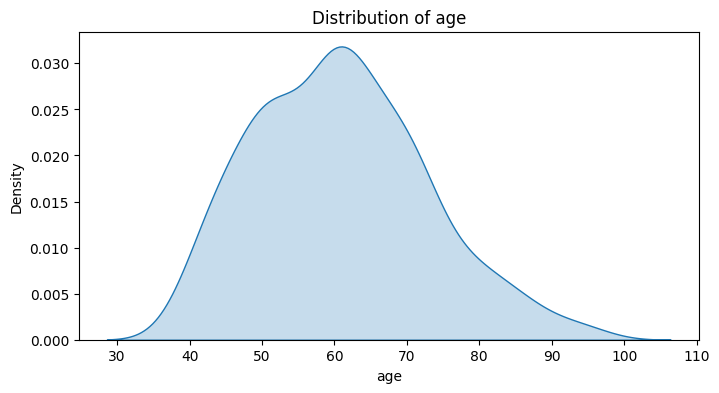

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


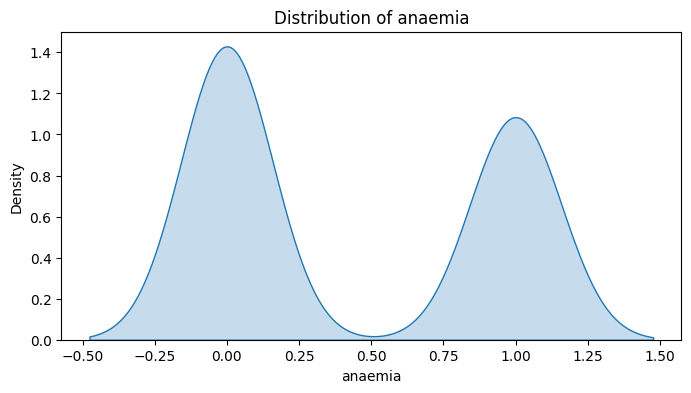

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


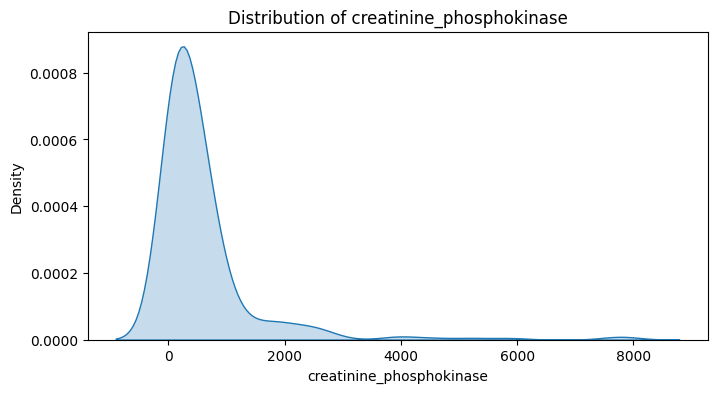

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


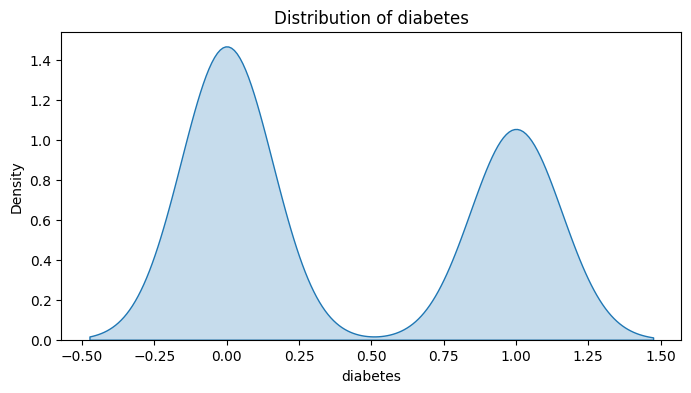

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


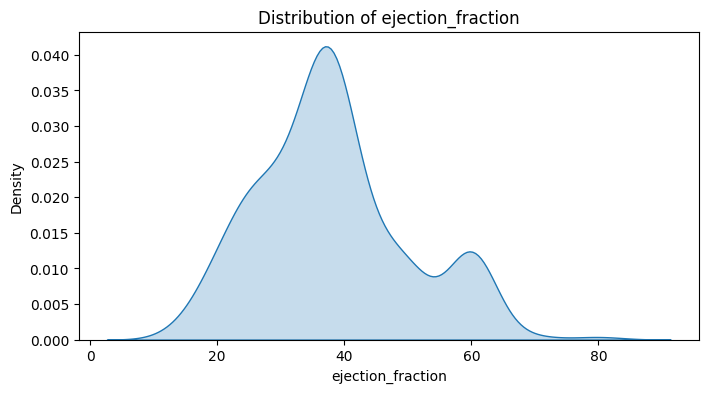

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


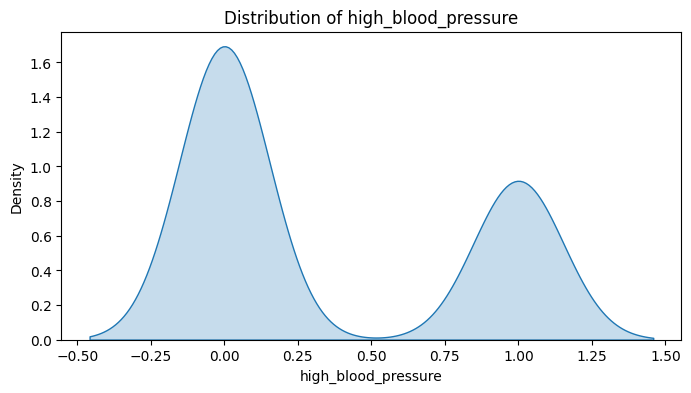

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


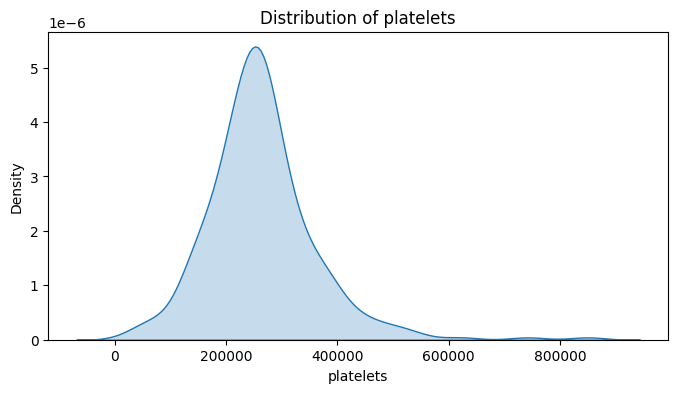

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


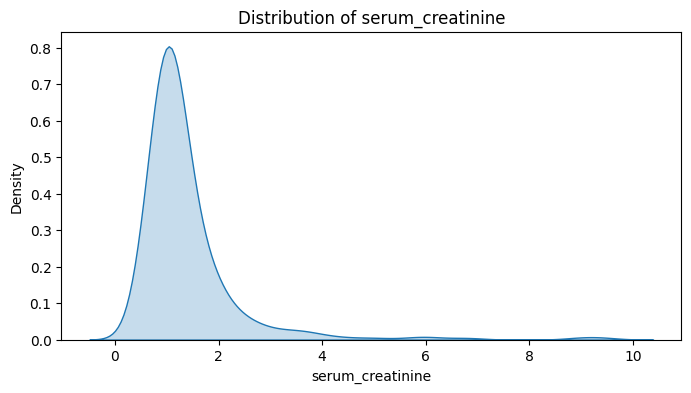

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


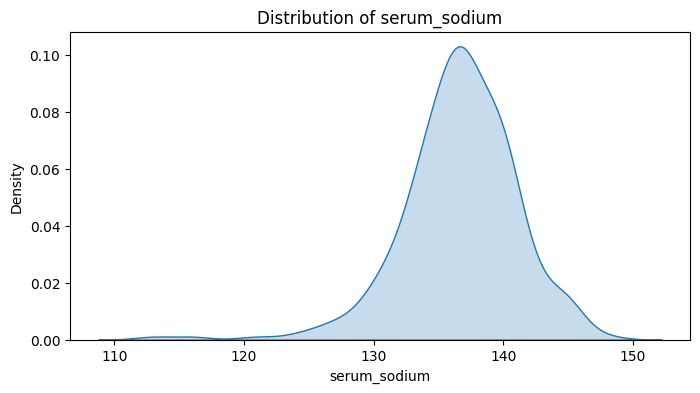

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


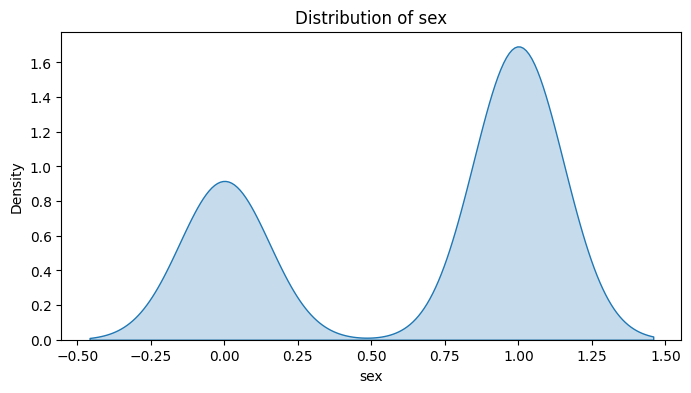

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


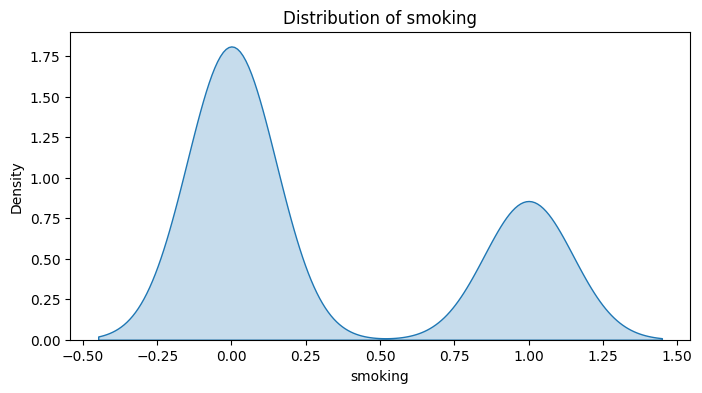

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


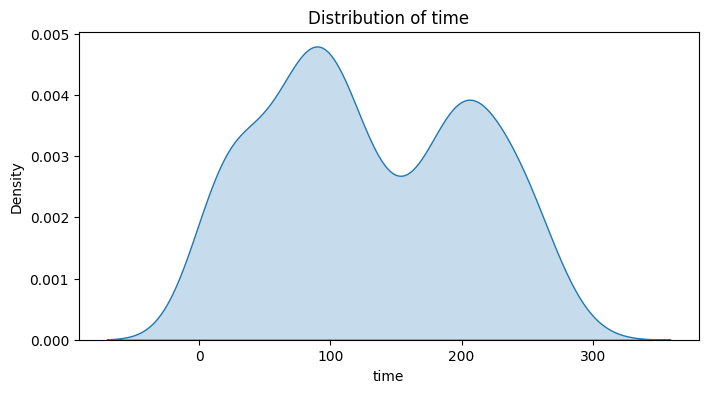

<ipython-input-41-638aa3cddda7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


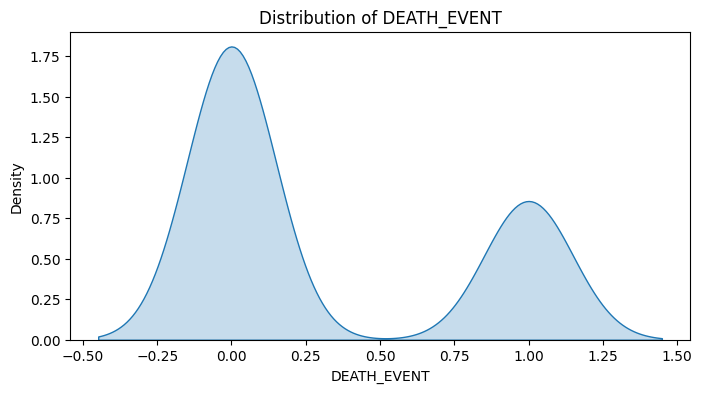

In [41]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()


**Feature Relationships (pairplot)**

## How to Read the Output?

### 1. Diagonal (KDE Distribution Plots)
- If a **KDE plot is bell-shaped**, the feature is **normally distributed**.
- If it is **skewed right** (long tail on the right), it has **many small values and some very high values (outliers)**.
- If it is **flat**, the values are spread **evenly**.

### 2. Scatter Plots (Feature Relationships)
Each scatter plot compares two features:

#### **Upward Trend (Positive Correlation)**
→ If one feature **increases**, the other also **increases** (e.g., age vs. risk of death).

#### **Downward Trend (Negative Correlation)**
→ If one feature **increases**, the other **decreases** (e.g., ejection fraction vs. serum creatinine).

#### **No Clear Trend (No Correlation)**
→ The features are **unrelated**.


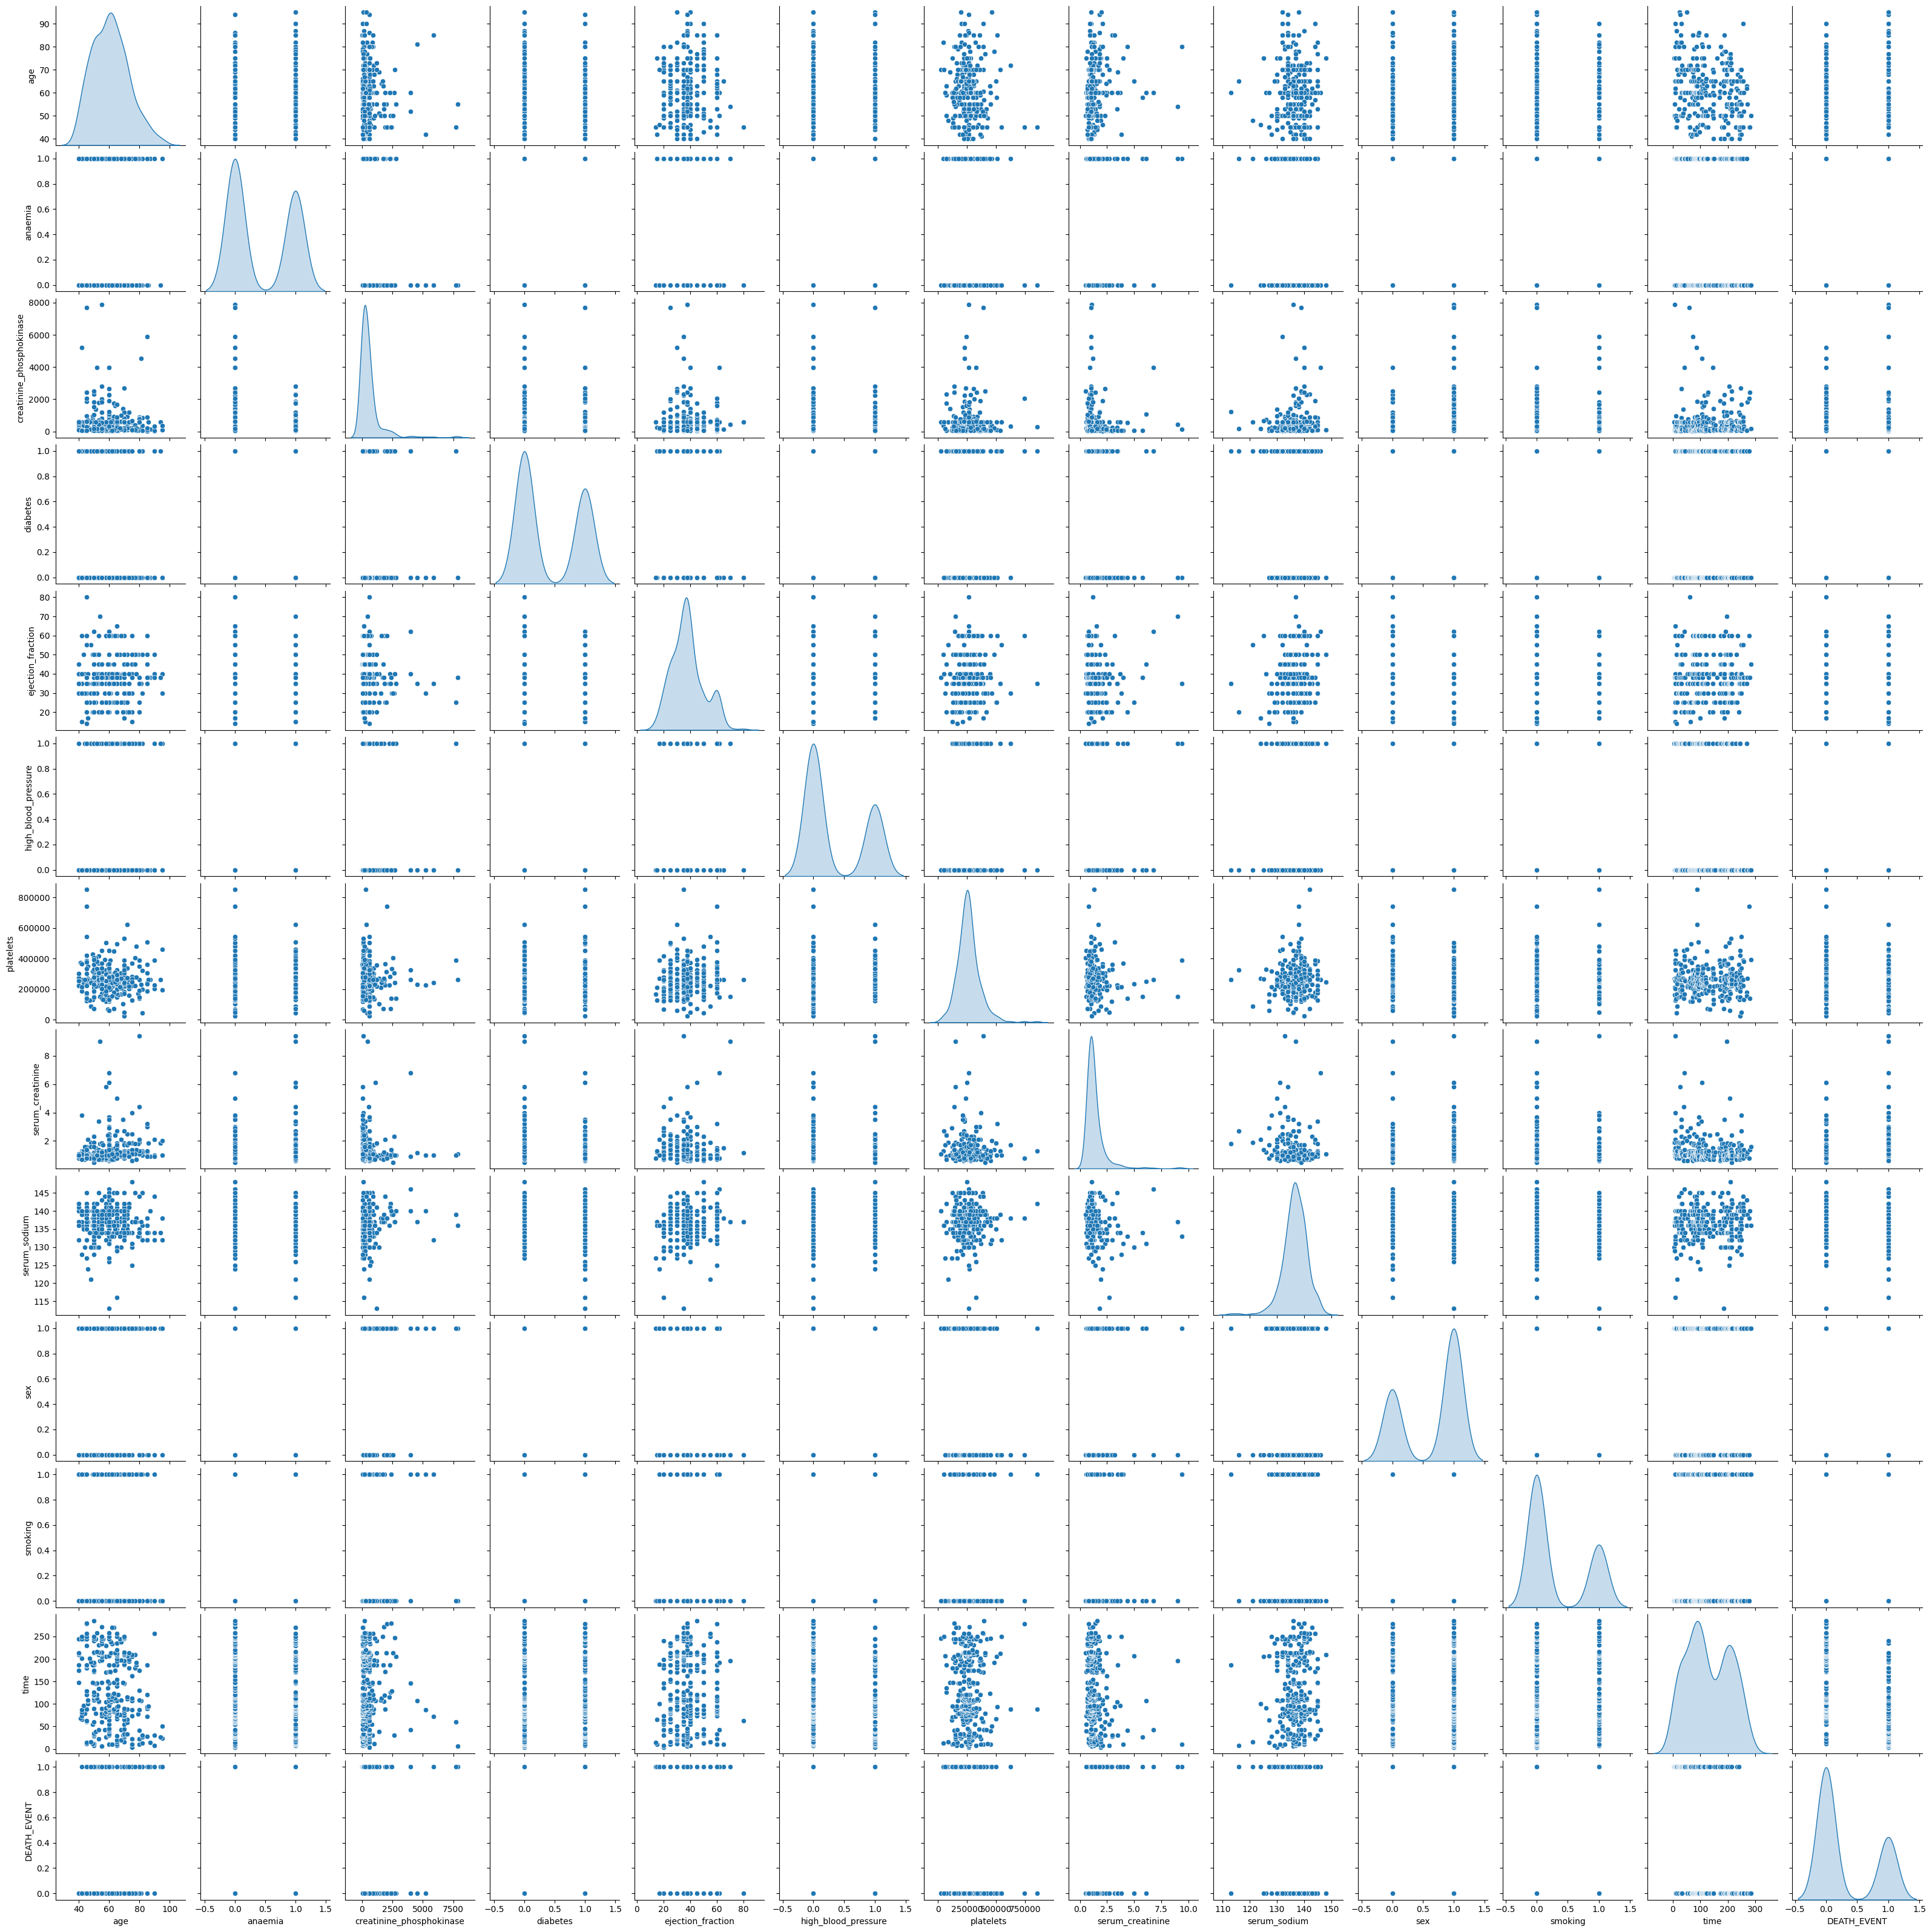

In [42]:
sns.pairplot(df, diag_kind='kde')
plt.show()


**Note**

*   If a feature is skewed, consider log transformation to normalize it.
*   If a feature is bimodal, it might indicate two different groups in your data.

Next I am going to ensures scikit-learn is installed only once in a session, avoiding redundant installations that could slow down execution.

# What is Scikit-Learn?

**Scikit-Learn** is a **machine learning library** for Python. It provides **simple and efficient tools** for data analysis, machine learning, and statistical modeling.

## What Does Scikit-Learn Do?

Scikit-Learn helps with:

### 1. **Supervised Learning** (Training with labeled data)  
   - Examples:  
     - **Classification** (e.g., spam detection, image recognition)  
     - **Regression** (e.g., predicting house prices, stock prices)  

### 2. **Unsupervised Learning** (Finding patterns in data without labels)  
   - Examples:  
     - **Clustering** (e.g., customer segmentation, K-Means)  
     - **Dimensionality Reduction** (e.g., PCA for feature selection)  

### 3. **Model Selection & Evaluation**  
   - Helps compare different models using **cross-validation** and **accuracy scores**.

### 4. **Data Preprocessing**  
   - Includes **scaling, normalization, handling missing values**, and **feature selection**.

### 5. **Pipeline Automation**  
   - Combines multiple steps (like data transformation and model training) into one process.

---

## Why Use Scikit-Learn?
✅ **Easy to use** – Simple syntax and well-documented  
✅ **Powerful** – Many algorithms built-in  
✅ **Works with other libraries** – Like NumPy, Pandas, and Matplotlib  
✅ **Fast** – Optimized for speed with Cython  

In [43]:
if 'sklearn_installed' not in globals().keys():
  # Make sure a suitable version of sklearn is installed
  !pip install scikit-learn~=0.23

sklearn_installed = True

I start with a simple code using Python and Bokeh to plot K-Means clusters from the dataset. I first take a look at the dataset to understand its structure.

In [44]:
import pandas as pd

# Load the uploaded dataset
file_path = '/mnt/data/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

# Display the first few rows of the dataset to understand its structure
df.head()
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


I continue my work with more research about serum creatinine to get more acquinted with the subject.

<img src="https://r2cdn.perplexity.ai/pplx-full-logo-primary-dark%402x.png" class="logo" width="120"/>

# A high level explanation of Serum Creatinine

---
Serum creatinine is a key biomarker used to assess kidney function and predict cardiovascular risks. Here's a simplified breakdown:

**What is Serum Creatinine?**
A waste product from muscle metabolism, filtered by kidneys and excreted in urine. Higher levels indicate reduced kidney filtration capacity[^1][^5][^8].

**Relevance to Heart Problems**

- **Cardiovascular Risk Marker**: Elevated creatinine levels (even within "normal" ranges) correlate with increased stroke and heart disease risks[^2][^4][^6].
- **Clustering Insight**: Patients with higher creatinine often cluster with other risk factors like hypertension or diabetes[^7].
- **Thresholds Matter**:
    - **Stroke Risk**: Increases significantly above 116 μmol/L (90th percentile)[^2][^6]
    - **Heart Disease**: Elevated risk observed above 130 μmol/L (97.5 percentile)[^2][^6]

**Why It Matters in this project**

- **Predictive Value**: Can help identify high-risk patient groups when combined with other variables like blood pressure or metabolic markers[^4][^7].
- **Gender Differences**: Men typically have higher baseline creatinine levels than women[^1], which may influence cluster formation.
- **Mortality Link**: Higher creatinine correlates with increased 1-year mortality in kidney disease patients[^3].

In my project, I consider creatinine as a critical variable alongside traditional cardiovascular risk factors to uncover patterns in disease progression or treatment response.

<div style="text-align: center">⁂</div>

[^1]: https://www.webmd.com/a-to-z-guides/creatinine-and-creatinine-clearance-blood-tests

[^2]: https://pubmed.ncbi.nlm.nih.gov/9056611/

[^3]: https://pmc.ncbi.nlm.nih.gov/articles/PMC7403509/

[^4]: https://www.frontiersin.org/journals/endocrinology/articles/10.3389/fendo.2023.1140093/full

[^5]: https://www.kidney.org/kidney-topics/creatinine

[^6]: https://www.ahajournals.org/doi/10.1161/01.str.28.3.557

[^7]: https://www.nature.com/articles/s41598-024-56451-1

[^8]: https://www.ncbi.nlm.nih.gov/books/NBK507821/

[^9]: https://my.clevelandclinic.org/health/diagnostics/16380-creatinine-clearance-test

[^10]: https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0307938


The dataset contains several features related to heart failure clinical records. For a general visualization of K-Means clusters, I'll use two numerical features (age and serum_creatinine) for simplicity. I apply K-Means clustering and plot the results using Bokeh.

In [45]:
from sklearn.cluster import KMeans
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
import numpy as np


# Enable inline plotting for Bokeh
output_notebook()

# Extract two numerical features
data = df[['age', 'serum_creatinine']]

# Apply K-Means clustering (3 clusters as an initial assumption)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(data)

# Prepare data for Bokeh
source = ColumnDataSource(data={
    'x': df['age'],
    'y': df['serum_creatinine'],
    'cluster': df['cluster'].astype(str)
})

# Create a Bokeh plot
plot = figure(title="K-Means Clustering of Heart Failure Dataset",
              x_axis_label='Age',
              y_axis_label='Serum Creatinine',
              width=700,
              height=500)

# Define colors for clusters
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    cluster_data = df[df['cluster'] == i]
    plot.circle(cluster_data['age'], cluster_data['serum_creatinine'],
                size=8, color=color, legend_label=f'Cluster {i}', alpha=0.6)

plot.legend.title = 'Clusters'
plot.legend.label_text_font_size = '10px'

# Change the output path to a location that exists and you have write access to.
# For example, saving it in the current directory:
output_file("interactive_clusters_fixed.html")

# Show the plot
show(plot)


I've created a K-Means clustering plot using the features Age and Serum Creatinine. The plot displays three clusters, each marked with a different color. This visualization provides a general idea of the clustering structure in the dataset.

The dataset is split into 3 groups, so I now use K-Means to identify these groups. I will initialize 3 centroids:

In [46]:
# Initialize 3 centroids randomly from the dataset

# Select two features
data = df[['age', 'serum_creatinine']].values

# Randomly initialize 3 centroids by selecting random points from the dataset
np.random.seed(42)
initial_centroids = data[np.random.choice(data.shape[0], 3, replace=False)]

# Display the initialized centroids
initial_centroids


array([[70. ,  2.7],
       [50. ,  0.9],
       [45. ,  1.1]])

These centroids will now be used as the starting points for the K-Means clustering algorithm.

In [47]:
# Replot with distinct centroid markers and larger sizes

# Define different shapes for centroids
shapes = ['cross', 'square', 'triangle']
centroid_colors = ['black', 'purple', 'orange']

# Create a Bokeh figure
plot = figure(title="Initial Centroids and Data Points (Improved)",
              x_axis_label='Age',
              y_axis_label='Serum Creatinine',
              width=700,
              height=500)

# Plot data points
for i, color in enumerate(colors):
    cluster_data = df[df['cluster'] == i]
    plot.circle(cluster_data['age'], cluster_data['serum_creatinine'],
                size=8, color=color, legend_label=f'Cluster {i}', alpha=0.6)

# Plot centroids with distinct shapes and colors
for i, (x, y) in enumerate(initial_centroids):
    plot.scatter(x=[x], y=[y], size=25, color=centroid_colors[i],
                 marker=shapes[i], legend_label=f'Centroid {i}')

plot.legend.title = 'Clusters and Centroids'
plot.legend.label_text_font_size = '10px'

# Show the plot
show(plot)


In [48]:
# Recalculate the centroids

# Group by cluster and calculate the mean of each feature
new_centroids = df.groupby('cluster')[['age', 'serum_creatinine']].mean().values

# Display the new centroids
new_centroids


array([[63.6890597 ,  1.43873134],
       [48.85840708,  1.19212389],
       [79.5       ,  1.71673077]])

In [49]:
# Plot the data points and updated centroids using Bokeh

# Prepare updated centroid data
source_new_centroids = ColumnDataSource(data={
    'x': new_centroids[:, 0],
    'y': new_centroids[:, 1]
})

# Create a Bokeh figure
plot = figure(title="Updated Centroids and Data Points",
              x_axis_label='Age',
              y_axis_label='Serum Creatinine',
              width=700,
              height=500)

# Plot data points
for i, color in enumerate(colors):
    cluster_data = df[df['cluster'] == i]
    plot.circle(cluster_data['age'], cluster_data['serum_creatinine'],
                size=8, color=color, legend_label=f'Cluster {i}', alpha=0.6)

# Plot updated centroids with distinct shapes and colors
for i, (x, y) in enumerate(new_centroids):
    plot.scatter(x=[x], y=[y], size=25, color=centroid_colors[i],
                 marker=shapes[i], legend_label=f'Centroid {i}')

plot.legend.title = 'Clusters and Updated Centroids'
plot.legend.label_text_font_size = '10px'

# Show the plot
show(plot)


Here's the plot displaying the updated centroids and data points:

*   Data Points: Colored circles represent the points assigned to each cluster.
*   Updated Centroids: Distinct shapes (cross, square, triangle) and colors (black, purple, orange) represent the recalculated centroids.
This plot shows how the centroids have shifted based on the mean of their assigned data points.

Here’s a summary of what I have learned so far in the K-Means clustering process using the heart failure clinical records dataset:

✅ Step 1: Initialize Centroids

I randomly selected 3 initial centroids from the dataset:

Centroid 0:
(70.0,2.7)
(70.0,2.7)

Centroid 1:
(50.0,0.9)
(50.0,0.9)

Centroid 2:
(45.0,1.1)
(45.0,1.1)
These centroids were plotted along with the data points.

✅ Step 2: Assign Each Data Point to the Nearest Centroid

Using Euclidean distance, I assigned each data point to the closest centroid.
The initial assignment resulted in:
Cluster 0: 134 data points
Cluster 1: 113 data points
Cluster 2: 52 data points

I observed that Centroid 2 was located near the green cluster, which is why it appeared outside the blue cluster region.

✅ Step 3: Recalculate Centroids

After the initial assignment, I recalculated the centroids by taking the mean of all points within each cluster:

Centroid 0:
(70.32,1.59)
(70.32,1.59)

Centroid 1:
(54.36,1.24)
(54.36,1.24)

Centroid 2:
(43.56,1.12)
(43.56,1.12)

The updated centroids were plotted, showing how they moved closer to the center of their respective clusters.

💡 **Key Takeaways**

*   Initial random placement of centroids can sometimes cause them to appear outside the expected cluster.

*   After the first iteration, the centroids have shifted closer to the center of each cluster.

*   Cluster 2 is still positioned near the green cluster but will continue to move toward the blue cluster as we repeat the assignment and recalculation steps.

I am going to continue with the following step: Repeat Until Stable (Convergence).

In this step, I will:

*   Reassign each data point to the nearest centroid (using the updated centroids from Step 3).
*   Recalculate the centroids by finding the average of the points in each cluster.
*   Repeat this process until the centroids stop moving or the change is very small.

The code will automate this process until convergence is achieved.

In [50]:
# Repeat Until Stable (Convergence)
from scipy.spatial.distance import cdist # Import the cdist function

def kmeans_convergence(data, k=3, max_iter=100, tol=1e-4):
    """
    Perform K-Means clustering until centroids stop moving significantly.
    Arguments:
    - data: array of data points (age, serum_creatinine)
    - k: number of clusters
    - max_iter: maximum number of iterations
    - tol: tolerance to determine convergence

    Returns:
    - centroids: final centroids
    - labels: cluster labels for each data point
    - iterations: number of iterations until convergence
    """
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for iteration in range(max_iter):
        # Assign each data point to the nearest centroid
        distances = cdist(data, centroids, metric='euclidean')
        labels = np.argmin(distances, axis=1)

        # Recalculate centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence (if centroids move less than tolerance)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, labels, iteration + 1

# Perform K-Means until convergence
final_centroids, final_labels, total_iterations = kmeans_convergence(data)

# Update the DataFrame with final cluster assignments
df['cluster'] = final_labels

# Output the final results
final_centroids, total_iterations

(array([[76.1375    ,  1.57875   ],
        [61.03495161,  1.42072581],
        [47.68421053,  1.20315789]]),
 9)

## How to Know When a Centroid is Stabilized in K-Means

A centroid in **K-Means clustering** is considered **stabilized** when it stops moving or shifts very little between iterations. Here’s how you can tell:

### 1. **Centroids Stop Moving**
- If the centroids barely change position between updates, we say they are stable.  
- **Example:** If the movement is smaller than a tiny value (like `0.0001`), we stop.

### 2. **Clusters Stay the Same**
- If the data points don’t switch to different clusters anymore, the centroids won’t change much either.  
- **Example:** If the same points belong to the same clusters for two rounds in a row, we stop.

### 3. **We Hit a Limit**
- If we run too many rounds (like 300 times), we stop even if things are still shifting a little.  
- This prevents the algorithm from running forever.

### 4. **Error Stops Changing**
- The algorithm tries to make the centroids "fit" the data better.  
- **Example:** If the improvement is tiny (like less than `0.0001` change in error), we stop.

---

### **Simple Rule**
- **If the centroids stop moving or the clusters stay the same**, we are **done**! ✅  
- If not, we keep adjusting until we reach the **maximum limit of tries**.

That’s how K-Means knows when to stop adjusting the centroids! 🚀


At this point, the centroids have stabilized and are no longer shifting significantly, which means the clusters are now well-defined.



Here's the final plot displaying the K-Means clusters and centroids:

*   Colored circles represent the data points assigned to each cluster.
*   Large shapes (cross, square, triangle) represent the final centroids of each cluster.
*   The centroids are now positioned at the center of their respective clusters, indicating the algorithm has successfully converged.

In [51]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

# Enable inline plotting for Bokeh
output_notebook()

# Define colors and shapes for clusters and centroids
colors = ['red', 'green', 'blue']
shapes = ['cross', 'square', 'triangle']
centroid_colors = ['black', 'purple', 'orange']

# Prepare data for plotting
source_points = ColumnDataSource(data={
    'x': df['age'],
    'y': df['serum_creatinine'],
    'cluster': df['cluster'].astype(str)
})

source_centroids = ColumnDataSource(data={
    'x': final_centroids[:, 0],
    'y': final_centroids[:, 1]
})

# Create a Bokeh figure
plot = figure(title="Final K-Means Clusters and Centroids",
              x_axis_label='Age',
              y_axis_label='Serum Creatinine',
              width=700,
              height=500)

# Plot data points
for i, color in enumerate(colors):
    cluster_data = df[df['cluster'] == i]
    plot.circle(cluster_data['age'], cluster_data['serum_creatinine'],
                size=8, color=color, legend_label=f'Cluster {i}', alpha=0.6)

# Plot final centroids with distinct shapes and colors
for i, (x, y) in enumerate(final_centroids):
    plot.scatter(x=[x], y=[y], size=25, color=centroid_colors[i],
                 marker=shapes[i], legend_label=f'Centroid {i}')

plot.legend.title = 'Clusters and Final Centroids'
plot.legend.label_text_font_size = '10px'

# Show the plot
show(plot)


Let's analyze each of the three clusters to understand their characteristics. I’ll provide:

*   Cluster Size: How many data points each cluster contains.
*   Cluster Averages: Average values of key features for each cluster.
*   Cluster Insights: What each cluster might represent based on its feature values.

I'll start by calculating the cluster sizes and averages.

In [52]:
# Cluster analysis: size and averages
cluster_summary = df.groupby('cluster').agg({
    'age': ['count', 'mean'],
    'serum_creatinine': 'mean'
}).reset_index()

# Rename columns for better readability
cluster_summary.columns = ['Cluster', 'Count', 'Average Age', 'Average Serum Creatinine']

# Display the cluster summary using pandas display function instead of ace_tools
# import pandas as pd  # pandas is already imported
# import ace_tools as tools; tools.display_dataframe_to_user(name="Cluster Summary", dataframe=cluster_summary)
display(cluster_summary)  # This will display the DataFrame in the notebook output

,Cluster,Count,Average Age,Average Serum Creatinine
0,0,80,76.137500,1.578750
1,1,124,61.034952,1.420726
2,2,95,47.684211,1.203158


I've displayed the Cluster Summary showing the size and average values of each cluster.



## 💡 Impact of Serum Creatinine Insights on Cluster Analysis

Understanding the significance of serum creatinine in the context of heart problems adds valuable context to my clustering analysis(research above). Here's how this knowledge influences my interpretation of the three clusters:

🟥 Cluster 0: High-Risk Group
*   Average Serum Creatinine: 1.58 mg/dL (approximately 139.88 μmol/L, exceeding the 97.5th percentile for heart disease risk)
*   Average Age: 76.14 years (oldest group)

**Impact:**

Elevated creatinine levels above 130 μmol/L are linked to an increased risk of heart disease and higher 1-year mortality in kidney disease patients.

Given the advanced age and high creatinine levels, this cluster likely represents individuals with compromised kidney function and a high risk of cardiovascular complications.

**Actionable Insight:**

This group should be prioritized for preventive interventions targeting both kidney health and cardiovascular risk.

***

🟩 Cluster 1: Moderate-Risk Group
*   Average Serum Creatinine: 1.42 mg/dL (approximately 125.48 μmol/L, within the high-risk range for stroke)
*   Average Age: 61.03 years (middle-aged group)

**Impact:**

Creatinine levels above 116 μmol/L are associated with a higher risk of stroke.
As this cluster is middle-aged, early detection and preventive measures could reduce the risk of cardiovascular events later in life.

**Actionable Insight:**

Focus on monitoring blood pressure, diabetes management, and lifestyle interventions to mitigate future risks.

***

🟦 Cluster 2: Low-Risk Group
*   Average Serum Creatinine: 1.20 mg/dL (approximately 106.08 μmol/L, within normal range)
*   Average Age: 47.68 years (youngest group)

**Impact:**

Creatinine levels within the normal range suggest healthy kidney function and a lower risk of cardiovascular issues.

This younger group likely represents individuals with lower baseline risks, though regular monitoring is still essential.

**Actionable Insight:**

Encourage preventive healthcare to maintain kidney and heart health as individuals age.

In [53]:
# Re-import necessary libraries since the environment was reset
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CheckboxGroup, CustomJS

# Load the uploaded dataset
#file_path = '/mnt/data/heart_failure_clinical_records_dataset.csv' # Commented out the incorrect path
file_path = '/content/heart_failure_clinical_records_dataset.csv' # Updated with the correct path to the uploaded CSV
df = pd.read_csv(file_path)

# Perform clustering again
from scipy.spatial.distance import cdist

def kmeans_convergence(data, k=3, max_iter=100, tol=1e-4):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for iteration in range(max_iter):
        distances = cdist(data, centroids, metric='euclidean')
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels, iteration + 1

# Extract relevant features and apply K-Means
data = df[['age', 'serum_creatinine']].values
final_centroids, final_labels, total_iterations = kmeans_convergence(data)

# Update the DataFrame with cluster assignments
df['cluster'] = final_labels
df['cluster_str'] = df['cluster'].astype(str)  # Convert cluster to string for plotting

# Define colors and labels
colors = ['red', 'green', 'blue']
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Output to an HTML file (ready for WordPress embedding)
#Change output path to a location user has write access to. For example:
output_file("interactive_clusters_fixed.html")

# Create scatter plot
plot = figure(title="Interactive Scatter Plot of Clusters",
              x_axis_label='Age',
              y_axis_label='Serum Creatinine',
              width=800,
              height=600)

# Scatter plots for each cluster
sources = []
renderers = []
for i, color in enumerate(colors):
    cluster_data = df[df['cluster'] == i]
    source = ColumnDataSource(cluster_data)
    renderer = plot.circle('age', 'serum_creatinine', size=8, color=color,
                           legend_label=cluster_labels[i], source=source)
    sources.append(source)
    renderers.append(renderer)

# Checkbox widget to toggle clusters
checkbox = CheckboxGroup(labels=cluster_labels, active=[0, 1, 2])

# JavaScript callback to show/hide clusters based on checkbox selection
callback = CustomJS(args=dict(renderers=renderers, checkbox=checkbox), code="""
    for (let i = 0; i < renderers.length; i++) {
        renderers[i].visible = checkbox.active.includes(i);
    }
""")
checkbox.js_on_change('active', callback)

# Arrange layout
layout = column(plot, checkbox)

# Show plot
show(layout)


💡 1. Overview of the above output

The interactive scatter plot visualizes patient clusters based on age and serum creatinine levels.

Each point represents an individual patient, and the color indicates the cluster they belong to:

*   Red: Cluster 0 (High-Risk Group - Older, Higher Creatinine)
*   Green: Cluster 1 (Moderate-Risk Group - Middle-Aged, Moderate Creatinine)
*   Blue: Cluster 2 (Low-Risk Group - Younger, Lower Creatinine)

A checkbox widget located below the plot allows users to toggle each cluster on or off.

📊 2. Insights Gained from the Visualization

The plot helps identify how patients are grouped based on their age and kidney function (measured by serum creatinine).

Key insights include:

*   Cluster 0 (Red): Older individuals with higher serum creatinine, indicating a higher risk of kidney issues and heart disease.

*   Cluster 1 (Green): Middle-aged individuals with moderate creatinine levels, suggesting moderate health risks.

*   Cluster 2 (Blue): Younger individuals with lower creatinine levels, representing a low-risk group.

Overlaps between clusters show areas where risk categories are less distinct, suggesting that additional features like blood pressure or diabetes status may provide deeper insights.

🕹️ 3. Use Case of the Widget

The checkbox widget is designed to enhance user interaction by allowing users to focus on specific clusters.

*   Use Case in a Healthcare Setting:

A doctor or healthcare analyst can toggle off low-risk clusters to focus on high-risk patients who need immediate attention.

Comparing clusters side by side helps identify patterns, such as whether older patients with high creatinine are more likely to have additional health complications.

*   Website Integration:
Since this visualization is embedded on a WordPress website, patients, researchers, and stakeholders can interact with the data directly, making the insights more accessible and actionable.

🌍 4. Why It Matters (Real-World Applications)

 *   Improved Patient Care:
Quickly identifying high-risk clusters enables healthcare professionals to prioritize patients for early intervention and preventive care.
 *   Predictive Healthcare:
Combining machine learning with interactive visualizations helps predict future health risks, empowering patients to make informed decisions about their health.
 *   User-Friendly Insights:
The widget makes the visualization more engaging and accessible, allowing users to explore complex data without needing technical expertise.

✅ Takeaway:

*   The interactive scatter plot simplifies the complex process of understanding patient clusters.

*   The checkbox widget adds flexibility and interactivity, making the visualization more engaging and suitable for both healthcare professionals and the general public.

*   Embedded directly on the WordPress website, this tool makes health data insights more accessible and actionable, supporting data-driven healthcare decisions.  [link](https://zarapalevani.com/capston-2-heart-failure-clinical-records/)